# TASK 1: Stock Data Analysis
Problem Statement:
1. Using Python, fetch historical stock data for any 5 stocks from the Nifty 50 index using the `yfinance` library. Use a time range of the last 6 months.
2. Perform the following analyses on the data:  
	a. Calculate the daily percentage change for each stock.  
	b. Plot the closing prices and daily percentage changes for the 5 stocks.   
	c. Calculate the moving average (20-day) for each stock and plot it against the stock's closing price.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

We fetch the data for **ITC, Maruti, TCS, Tatasteel and Reliance stocks** :

In [2]:
tickers = ['ITC.NS', 'MARUTI.NS', 'TCS.NS', 'TATASTEEL.NS', 'RELIANCE.NS']
data = yf.download(tickers = tickers, period = '6mo')
closing_price = data['Close']
closing_price.head()

[*********************100%***********************]  5 of 5 completed


Ticker,ITC.NS,MARUTI.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS
Date,,,,,
2024-04-22 00:00:00+00:00,425.299988,12785.500000,2959.699951,161.850006,3864.600098
2024-04-23 00:00:00+00:00,429.200012,12996.250000,2918.649902,161.149994,3874.699951
2024-04-24 00:00:00+00:00,428.899994,12944.049805,2900.350098,165.550003,3831.050049
2024-04-25 00:00:00+00:00,437.549988,12922.500000,2919.949951,167.699997,3852.199951
2024-04-26 00:00:00+00:00,440.000000,12703.349609,2905.100098,165.800003,3821.350098


Now we fetch the daily percentage change for each stock.

In [3]:
daily_pct_change = closing_price.pct_change()* 100
daily_pct_change.head()

Ticker,ITC.NS,MARUTI.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS
Date,,,,,
2024-04-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-04-23 00:00:00+00:00,0.917006,1.648352,-1.386967,-0.432507,0.261343
2024-04-24 00:00:00+00:00,-0.069902,-0.401656,-0.626996,2.730381,-1.126536
2024-04-25 00:00:00+00:00,2.016786,-0.166484,0.675775,1.298698,0.552065
2024-04-26 00:00:00+00:00,0.559939,-1.695882,-0.508565,-1.132972,-0.800837


Plotting for the Closing price for each stock.

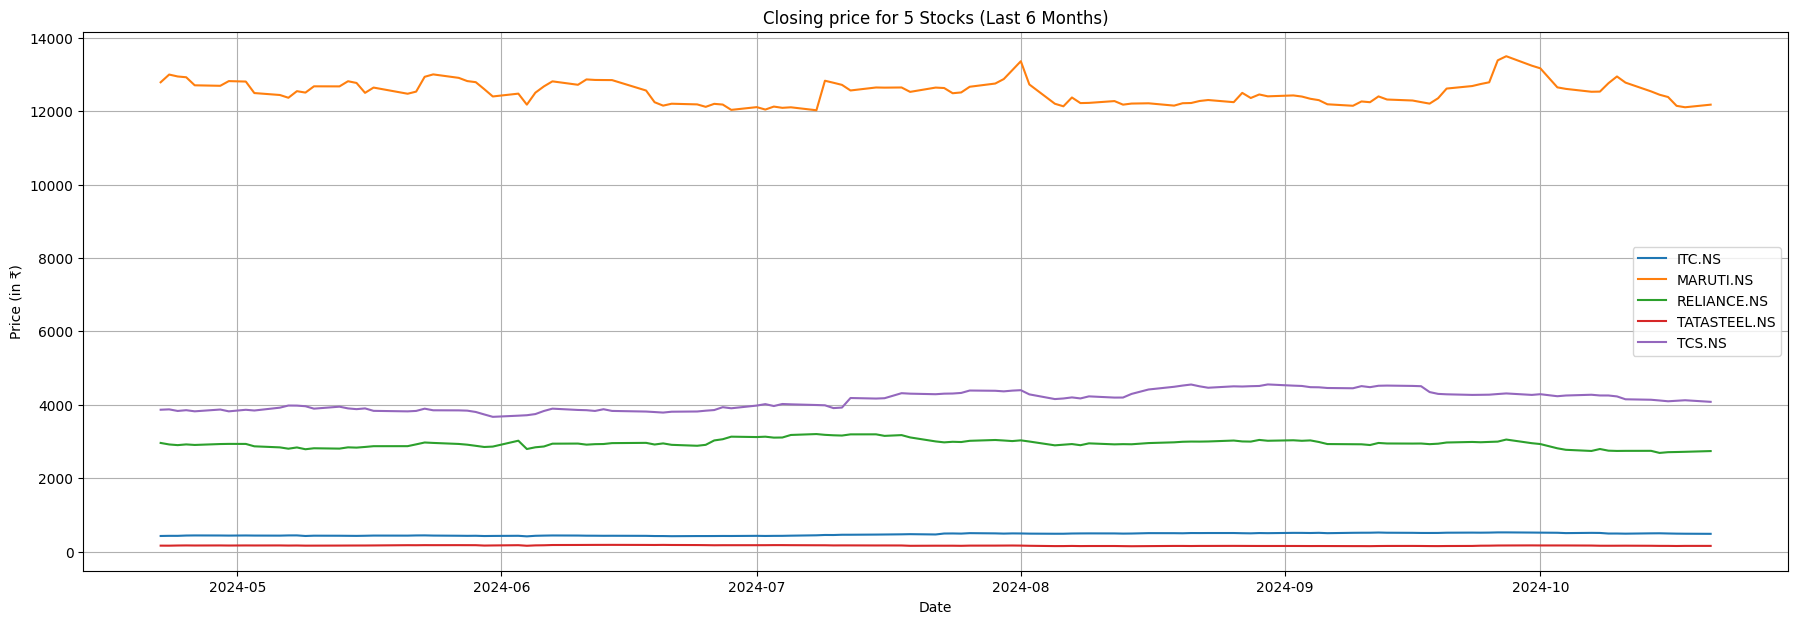

In [4]:
plt.figure(figsize=(22, 7))

for stock in closing_price.columns:
    plt.plot(closing_price.index, closing_price[stock], label=stock)

plt.title('Closing price for 5 Stocks (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price (in ₹)')
plt.legend()
plt.grid(True)
plt.show()

Since we see a significant closing price difference among our stocks, lets plot them individually for better visualization of the closing price trends.

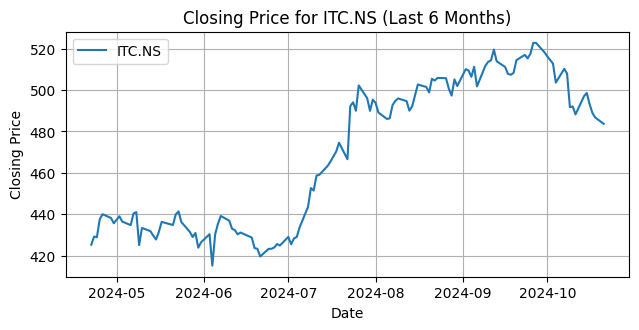

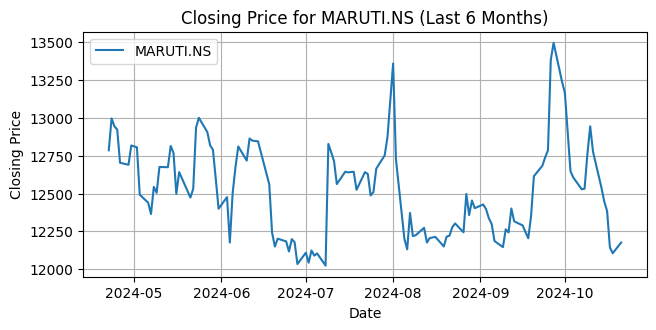

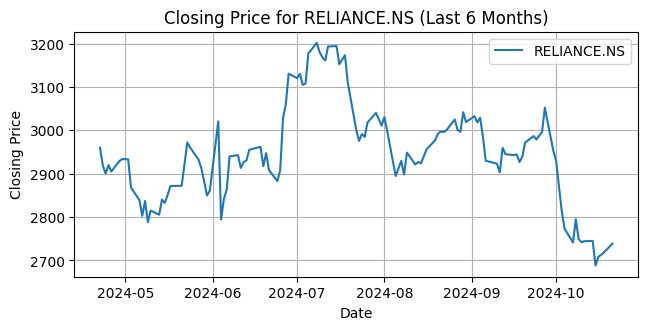

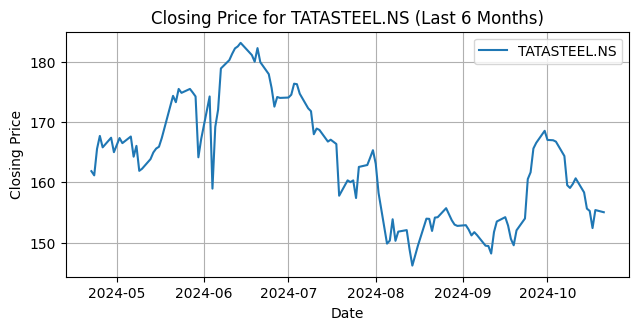

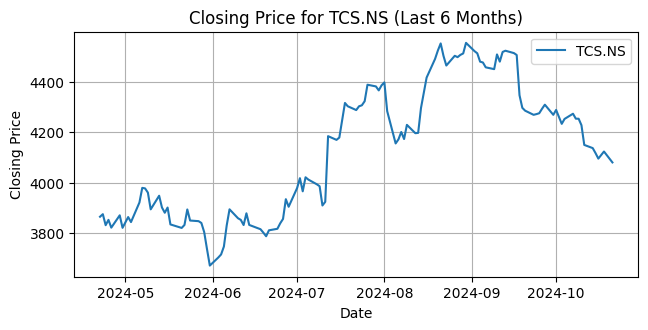

In [5]:
for i, stock in enumerate(closing_price.columns):
    plt.figure(figsize=(16, 7))
    plt.subplot(2, 2, i % 4 +1)
    plt.plot(closing_price.index, closing_price[stock], label=stock)
    plt.title(f'Closing Price for {stock} (Last 6 Months)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()


Plotting for daily percentage change for each stock

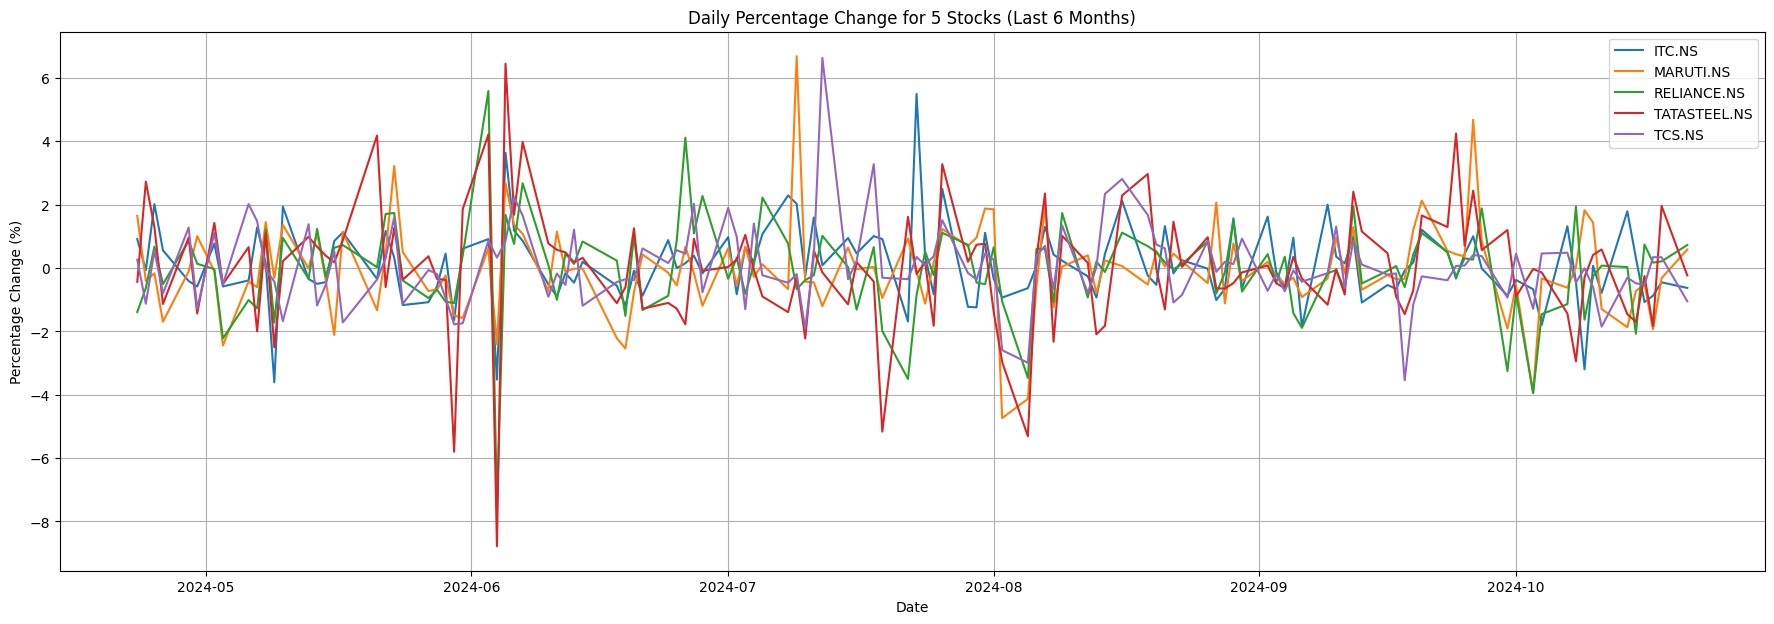

In [6]:
plt.figure(figsize=(22, 7))

for stock in daily_pct_change.columns:
    plt.plot(daily_pct_change.index, daily_pct_change[stock], label=stock)

plt.title('Daily Percentage Change for 5 Stocks (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()

Next we calculate the **moving average** for all the 5 stocks with a window size 20 and plot them.

In [7]:
moving_avg = closing_price.rolling(window= 20).mean()
moving_avg[:20].head()

Ticker,ITC.NS,MARUTI.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS
Date,,,,,
2024-04-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-04-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-04-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-04-25 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-04-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


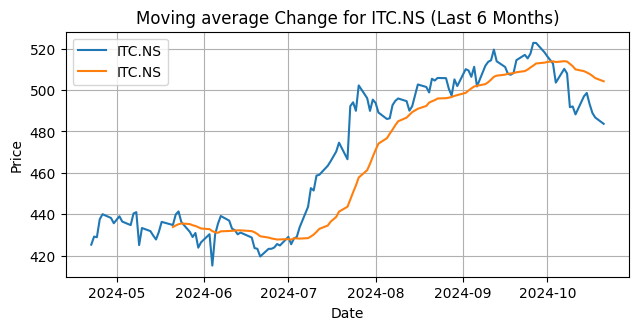

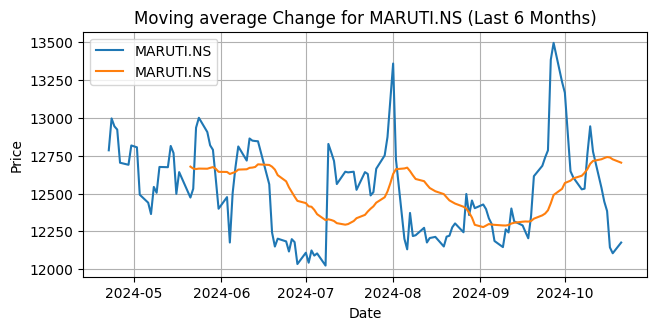

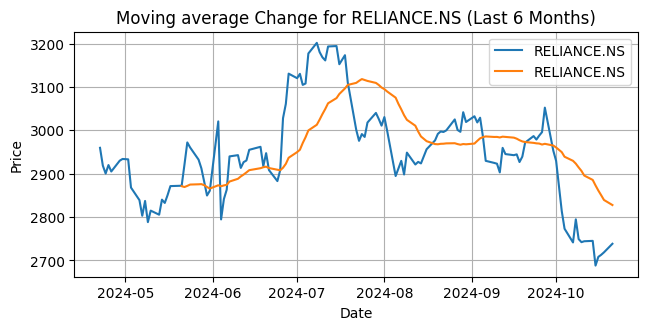

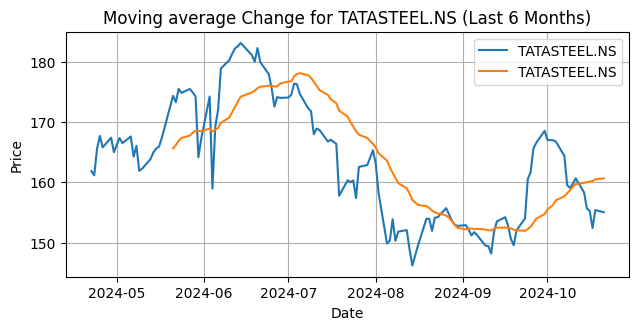

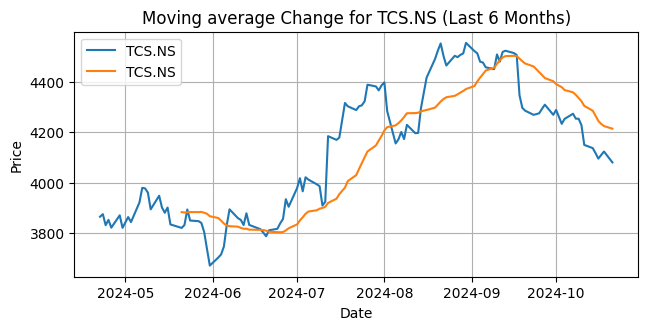

In [8]:
for i, stock in enumerate(closing_price.columns):
    plt.figure(figsize=(16, 7))
    plt.subplot(2, 2, i % 4 +1)
    plt.plot(closing_price.index, closing_price[stock], label=stock)
    plt.plot(moving_avg.index, moving_avg[stock], label=stock)

    plt.title(f'Moving average Change for {stock} (Last 6 Months)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# TASK 2: Strategy Development

1. Develop a simple moving average crossover strategy for one of the 5 stocks. The strategy should involve a short-term moving average (e.g., 50-day) and a long-term moving average (e.g., 200-day).
2. Backtest this strategy on the historical data to identify buy and sell signals.
3. Calculate the returns generated by the strategy compared to a simple buy-and-hold approach.

We chose **TCS.NS** stock to build our strategy.  
Our strategy will use **short and long term simple moving averages** with window size 50 and 200 respectively.

[*********************100%***********************]  1 of 1 completed


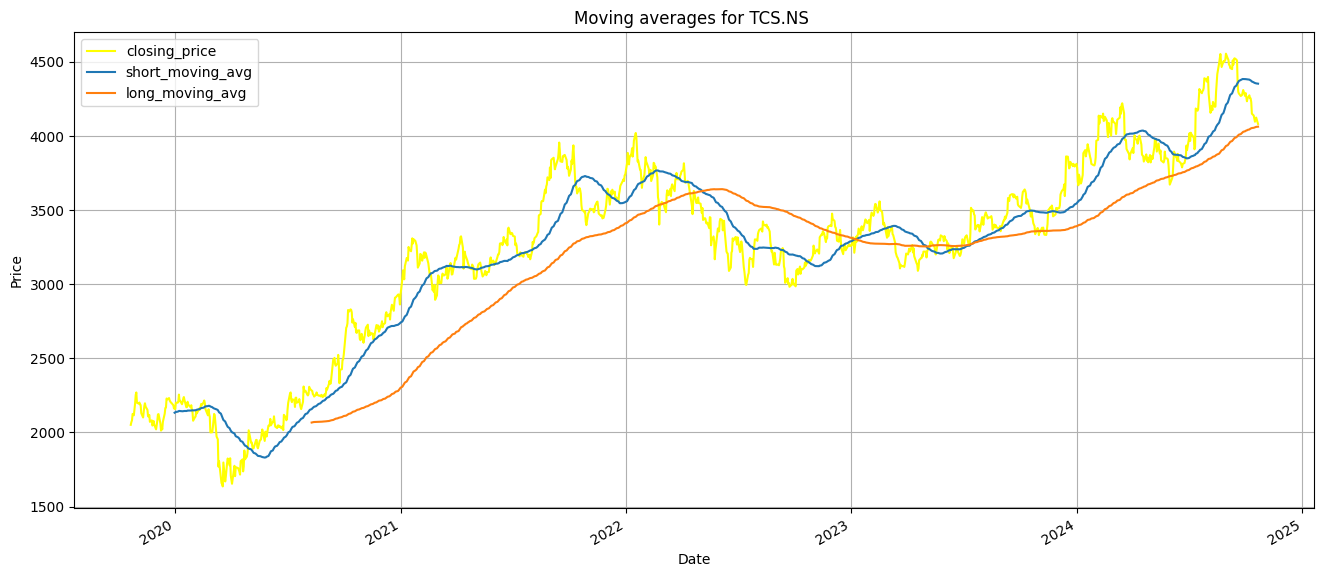

In [9]:
stock = 'TCS.NS'
data = yf.download(tickers = stock, period='5y',)

data['short_SMA'] = data['Close'].rolling(window= 50).mean()
data['long_SMA'] = data['Close'].rolling(window= 200).mean()

plt.figure(figsize=(16, 7))
data['Close'].plot(label= 'closing_price', color='yellow')
data['short_SMA'].plot(label='short_moving_avg')
data['long_SMA'].plot(label='long_moving_avg', )

plt.title(f'Moving averages for TCS.NS ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Our strategy to buy or sell involving simple moving averages(SMA):  
Buy: When `short_SMA` is **above** `long_SMA`  
Sell: When `short_SMA` is **below** `long_SMA`

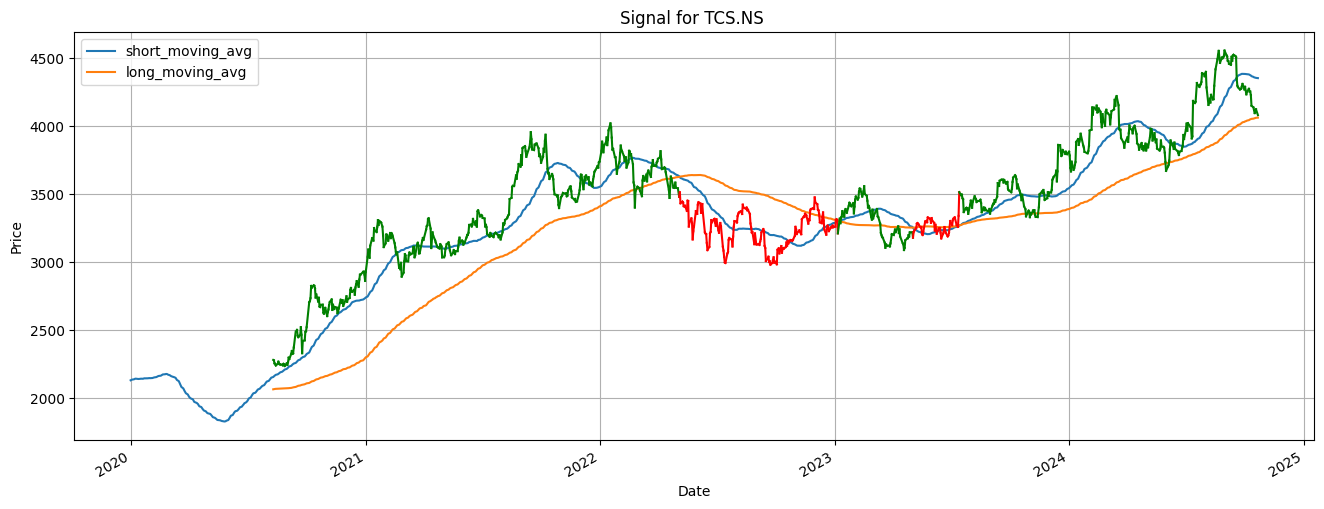

In [10]:
import numpy as np

# Signal is 1 if short_SMA is > long_SMA otherwise, -1
data['Signal'] = np.where(data['short_SMA'] > data['long_SMA'], 1, -1)
data['Position'] = data['Signal']

plt.figure(figsize=(16, 6))

data['short_SMA'].plot(label='short_moving_avg')
data['long_SMA'].plot(label='long_moving_avg', )

for i in range(200, len(data)):
    if data['Position'].iloc[i] == 1: # Buy signal (green)
        plt.plot(data.index[i-1:i+1], data['Close'].iloc[i-1:i+1], color='green')
    elif data['Position'].iloc[i] == -1:  # Sell signal (red)
        plt.plot(data.index[i-1:i+1], data['Close'].iloc[i-1:i+1], color='red')

plt.title(f'Signal for TCS.NS ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Now we calculate and the profit generated by our SMA strategy we developed above.  
Then we compare it with the profit generated to a simple buy and hold approach

In [11]:
starting_balance = 10000
buy_and_hold_balance = starting_balance * (data['Close'].iloc[-1] / data['Close'].iloc[0])
crossover_balance = starting_balance
hold = False

for i in range(1, len(data)):
    # Buy signal
    if data['Position'].iloc[i] == 1 and not hold:
        hold = True
        buy_price = data['Close'].iloc[i]

    # Sell signal
    elif data['Position'].iloc[i] == -1 and hold:
        hold = False
        sell_price = data['Close'].iloc[i]
        crossover_balance = crossover_balance * (sell_price / buy_price)

if hold: # We sell at the last price if still holding the stock
    sell_price = data['Close'].iloc[-1]
    profit = (sell_price - buy_price) / buy_price * crossover_balance
    crossover_balance += profit


buy_and_hold_return = (buy_and_hold_balance - starting_balance) / starting_balance * 100
crossover_return = (crossover_balance - starting_balance) / starting_balance * 100

print(f"Buy-and-Hold Strategy Balance: ${buy_and_hold_balance:.2f}")
print(f"Buy-and-Hold Return: {buy_and_hold_return:.2f}%")
print(f"SMA Strategy Balance: ${crossover_balance:.2f}")
print(f"SMA Strategy Return: {crossover_return:.2f}%")

Buy-and-Hold Strategy Balance: $19888.13
Buy-and-Hold Return: 98.88%
SMA Strategy Balance: $17445.59
SMA Strategy Return: 74.46%


We see above that our MSA strategy *underperforms* the simple buy hold strategy.  
This could be because the stock data is not volatile

# TASK 3: Risk Management
1. Calculate the maximum drawdown for each stockover the 6-month period.
2. For the stock you selected in Task 2, implement a stop-loss mechanism. Assume a stop loss of 5%. Re-run the strategy with the stop-loss and compare the performance to the original strategy.

Maximum drawdown for each stock over the 6-month period :

In [12]:
stocks = ['ITC.NS', 'MARUTI.NS', 'TCS.NS', 'TATASTEEL.NS', 'RELIANCE.NS']
all_data = yf.download(tickers = stocks, period = '6mo')
closing_price = all_data['Close']

def max_drawdown(stock_prices):
    cumulative_max = stock_prices.cummax()
    drawdown = (stock_prices - cumulative_max) / cumulative_max
    return drawdown.min()

for stock in stocks:
    max_dd = max_drawdown(closing_price[stock])
    print(f"Maximum Drawdown for {stock}: {max_dd * 100:.2f}%")

[*********************100%***********************]  5 of 5 completed

Maximum Drawdown for ITC.NS: -7.48%
Maximum Drawdown for MARUTI.NS: -10.30%
Maximum Drawdown for TCS.NS: -10.41%
Maximum Drawdown for TATASTEEL.NS: -20.19%
Maximum Drawdown for RELIANCE.NS: -16.05%


Now we add a `stop_loss` of 5% (0.05) to our SMA strategy and then recalculate the profit generated considering the `stop_loss`

In [13]:
stop_loss = 0.05
initial_balance = 10000
crossover_balance = initial_balance
hold = False
buy_price, sell_price= 0, 0

for i in range(1, len(data)):
    current_price = data['Close'].iloc[i]

    # Sell
    if data['Position'].iloc[i] == 1 and not hold:
        hold = True
        buy_price = data['Close'].iloc[i]

    # Buy
    elif data['Position'].iloc[i] == -1 and hold:
        hold = False
        sell_price = data['Close'].iloc[i]
        crossover_balance = crossover_balance * (sell_price / buy_price)

    # Stop loss condition check
    if hold and current_price <= buy_price * (1 - stop_loss):
        hold = False
        sell_price = current_price
        profit = (sell_price - buy_price) / buy_price * crossover_balance
        crossover_balance += profit

# If still holding in end, Sell
if hold:
    sell_price = data['Close'].iloc[-1]
    profit = (sell_price - buy_price) / buy_price * crossover_balance
    crossover_balance += profit

stop_loss_return = (crossover_balance - initial_balance) / initial_balance * 100
print(f"Crossover Strategy Return with Stop-Loss: {stop_loss_return:.2f}%")

Crossover Strategy Return with Stop-Loss: 76.55%


We see that adding a stop-loss improved the SMA crossover strategy return from **74.46% to 76.55%**.